<a href="https://colab.research.google.com/github/victorm0202/temas_selectos_DL/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes neuronales convolucionales (CNN) con Keras**

In [ ]:
import keras
keras.__version__

'2.6.0'

## Usaremos como ejemplo, los famosísimos dígitos MNIST

In [ ]:
import  matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_lab), (test_images, test_lab) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_lab)
test_labels = to_categorical(test_lab)

11501568/11490434 [==============================] - 0s 0us/step


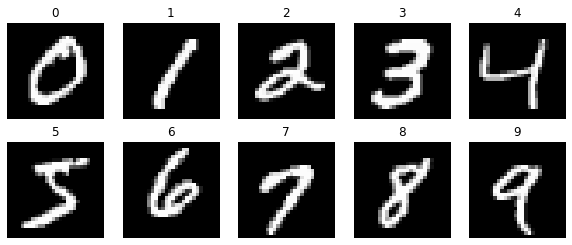

In [ ]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_lab).index(i)
    plt.imshow(train_images[idx].reshape(28,28), 'gray')
    plt.title(train_lab[idx])
    plt.axis('off')
    
plt.show()

### Ajustamos una MLP para comparar resultados. Recuerda que en éste caso, las imágenes son tratadas como un vector de pixeles

In [ ]:
from keras import models
from keras import layers
import time

mlp = models.Sequential()
mlp.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mlp.add(layers.Dense(10, activation='softmax'))

mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tic=time.time()
history = mlp.fit(train_images, train_labels, epochs=5, validation_split=0.0, batch_size=128)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2554 - accuracy: 0.9274
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9887
Procesamiento:  9.672086715698242  seg


In [ ]:
test_loss, test_acc = mlp.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9809
test_acc: 0.98089998960495


Para éste modelo simple, se obtiene una precisión no tan mala (0.979)

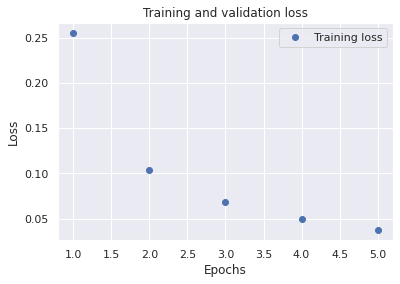

In [ ]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Ahora, ajustamos una CNN sencilla

Primero, debemos reformatear los arreglos de las imágenes, ya que en éste caso son tensores en 2D

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Puedes recurrir a la ayuda de Keras: https://keras.io/api/layers/convolution_layers para los parámetros de las capas de convolución.

In [ ]:
#del cnn1

cnn1 = models.Sequential()
# extraccion caracteristicas
cnn1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu'))
# capa densa
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(units= 64, activation='relu'))
cnn1.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### Observa los parámetros a calcular y compáralos con la MLP ajustada antes...

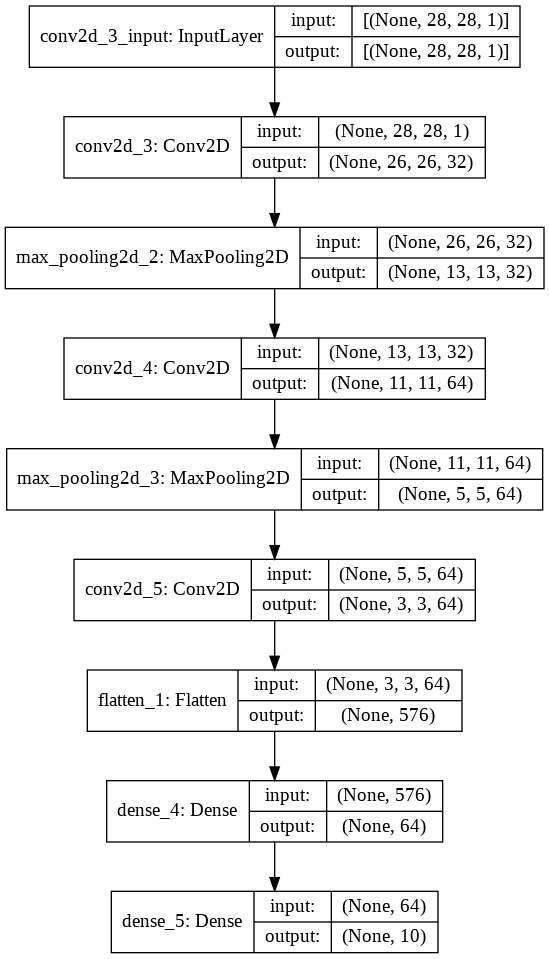

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

#plot_model(cnn1, to_file='cnn1.png',show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='cnn1.png')
plot_model(cnn1, to_file='cnn1.png',show_shapes=True, show_layer_names=True)

In [ ]:
cnn1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

tic=time.time()
history = cnn1.fit(train_images, train_labels, validation_split=0.0, epochs=5, batch_size=64)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
938/938 [==============================] - 10s 9ms/step - loss: 0.1781 - accuracy: 0.9433
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0336 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0194 - accuracy: 0.9942
Procesamiento:  83.06044554710388  seg


### Compara su desempeño en la precisión de prueba

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9908
test_acc: 0.9908000230789185


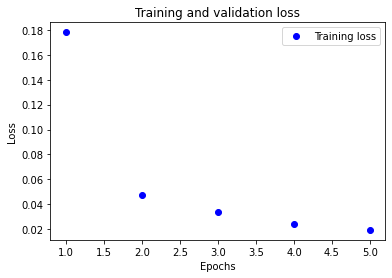

In [ ]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

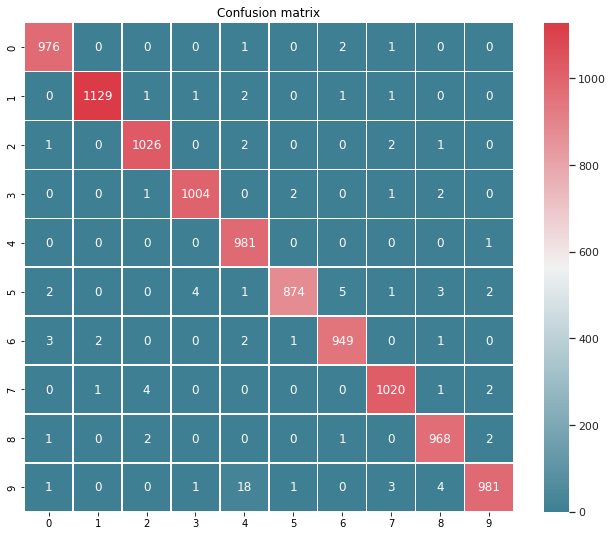

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = cnn1.predict(test_images)

test_true_labels = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)

C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Confusion matrix')

plt.show()

(-0.5, 27.5, 27.5, -0.5)

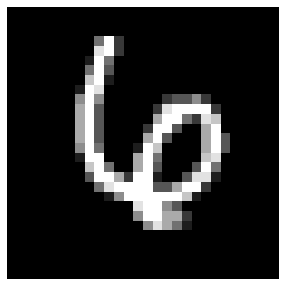

In [ ]:
img = test_images[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [ ]:
from keras.models import Model
import numpy as np

In [ ]:
layer_names = []
for layer in cnn1.layers[0:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

In [ ]:
layer_names

['conv2d_3', 'max_pooling2d_2', 'conv2d_4', 'max_pooling2d_3', 'conv2d_5']

In [ ]:
layer_outputs = [layer.output for layer in cnn1.layers[0:5]]
activation_model = Model(inputs=cnn1.input,outputs=layer_outputs)
activations = activation_model.predict(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


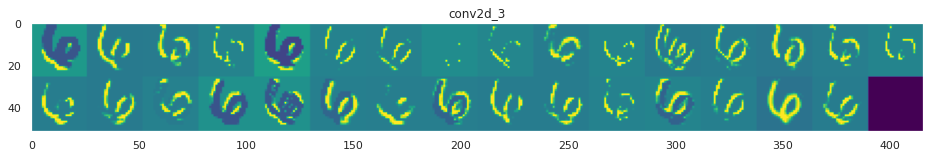

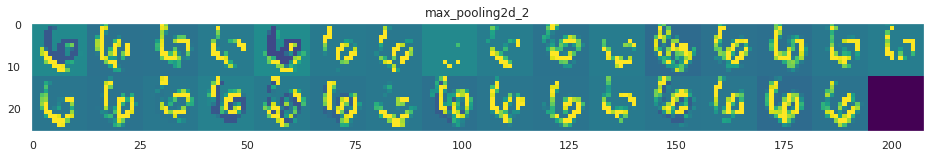

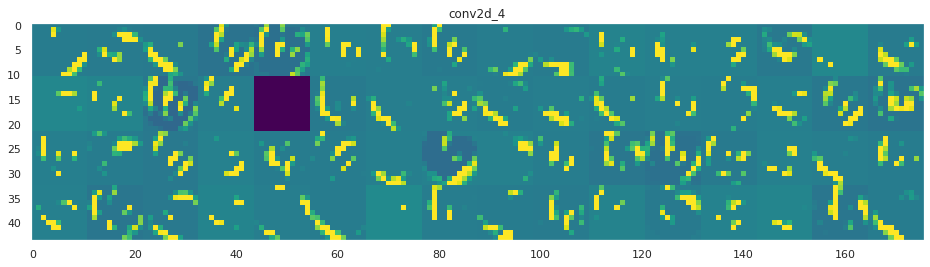

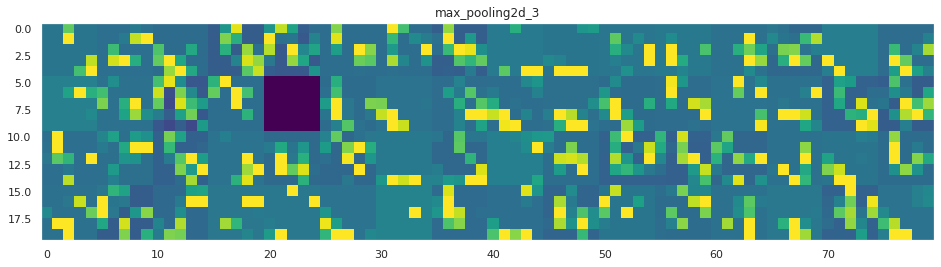

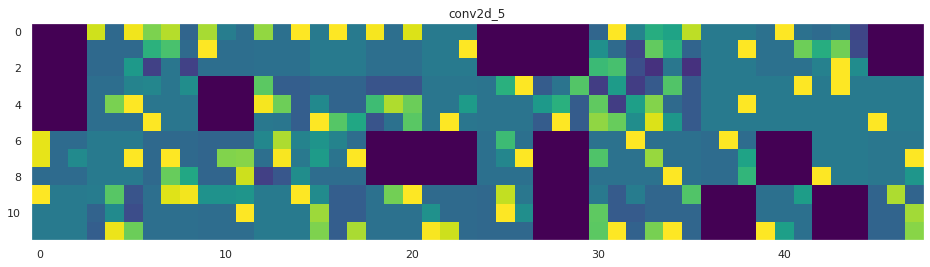

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')